### "There's a package for that"

https://pypi.org/
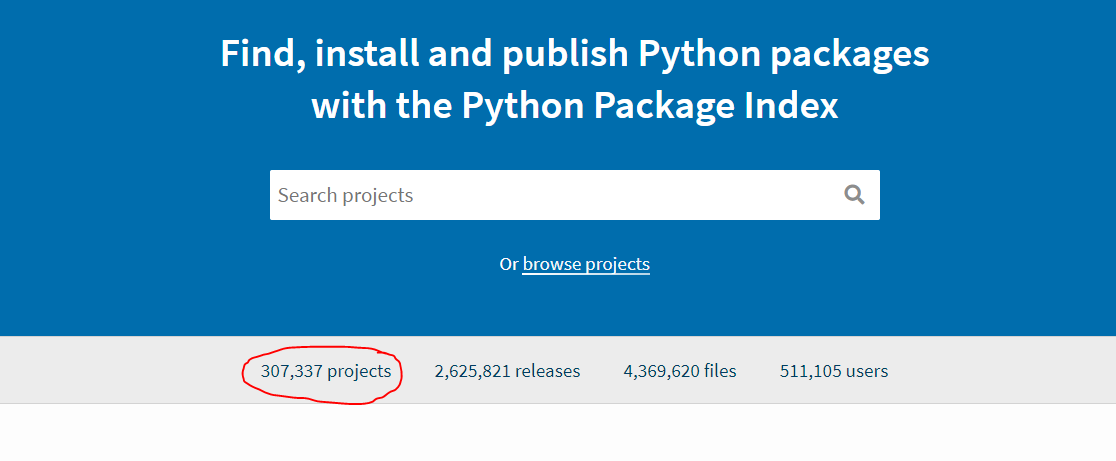

### "Just a popularity-contest?"
https://pypl.github.io/PYPL.html

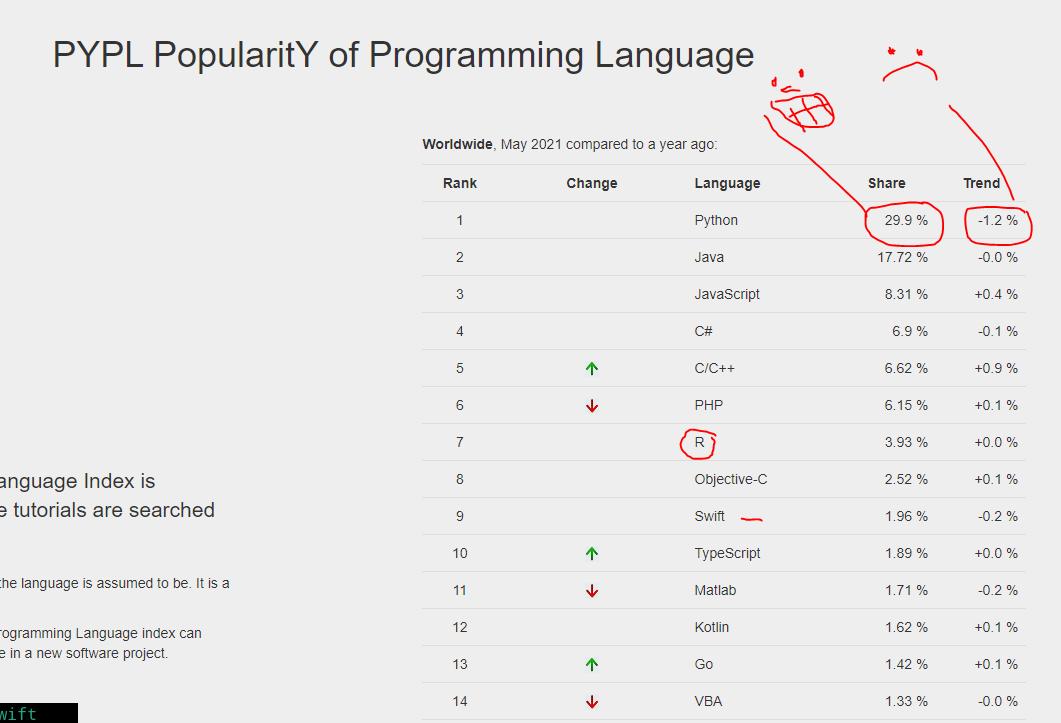

In [ ]:
# En dropdown av alle innstallerte pakker

In [6]:
import subprocess
import json
import ipywidgets as widgets
from importlib.metadata import version, metadata, requires

In [7]:
data = subprocess.check_output(["pip", "list", "--format", "json"])
parsed_results = json.loads(data)
pk_list = [(element["name"]) for element in parsed_results]

In [8]:
# Definer dropdown
pk = widgets.Dropdown(
    options= pk_list,
    description='Se på:',
    value=pk_list[0],
    disabled=False,
)

def combo_out(pack):
    # Annen interessant info om pakken
    # Version
    print(f"Version: {version(pack)}")
    # Requirements
    req = requires(pack)
    if req:
        print('-'*55)
        print(f"Requires:")
        for x in req: print(x.split(';',1)[0])
    print('-'*55 + "\n")
    
    # Display ny hjelp-docs for den valgte dropdown-valget
    help(pack)
    

# Definer intiell output-område
out = widgets.Output(layout={'border': '1px solid white'})
with out:
    display(pk)
    combo_out(pk_list[0])
    
# Decorator for å ta oppdatert output
@out.capture()
def on_value_change(change):
    # Om vi ikke clearer output, så vil neste docs komme under forrige
    out.clear_output()
    # Om vi ikke displayer denne igjen, vil den bli borte
    display(pk)
    # combined output function
    combo_out(change['new'])

# Call funksjonen over når endringer gjøres til dropdownen
pk.observe(on_value_change, names='value')

# Display outputen
display(out)

Output(layout=Layout(border='1px solid white'))